## Questions about the Data Frame Shape Files

1. After the fire station shape file (Facilities.shp with type "Fire") is imported, there is only 28. It is supposed to be 29, right?
2. After the fire zone shape file (Firezones_4_17_2014.shp) is imported, there is only 251. It is supposed to be 272 ?
3. After the aggregated fie zone shape file (DissolveFDZ160607.shp) is imported, there is 29. This is correct, right?

In [2]:
import os
#path = "/Users/updating/documents/DATA_SCIENCE/CCFD"
path = "/Users/lzhang18/Documents/DATA_SCIENCE/CCFD"
os.chdir(path)

import geopandas as gp
import matplotlib.pyplot as plt
%matplotlib inline

### Fire Stations Data

In [3]:
facilities = gp.GeoDataFrame.from_file(path+"/Supporting_GIS_data/Facilities/Facilities.shp")
fire_facilities = facilities[facilities["TYPE"]=="Fire"]

In [18]:
fire_facilities.shape
# ??? should be 29 fire stations

(28, 7)

In [4]:
fire_facilities.head(2)

,ADDRESS,NAME,OBJECTID,PHONE,TYPE,URL,geometry
73,4550 Cowan Rd,Cobb County Fire Station Number 11,74,770-528-8000,Fire,http://fire.cobbcountyga.gov/station-11.htm,POINT (2145199.03 1479238.57)
74,1660 Mars Hill Rd,Cobb County Fire Station Number 18,75,770-528-8000,Fire,http://fire.cobbcountyga.gov/station-18.htm,POINT (2132983.18 1453636.23)


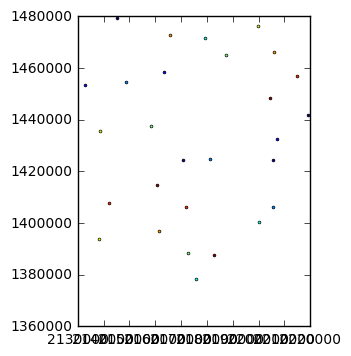

In [19]:
fire_facilities.plot()

### Fire Zones Data

#### Individual Zones

In [3]:
firezones = gp.GeoDataFrame.from_file(path+"/Updated_GIS_Data/FireZones_8_31_2016/FireZones_8_31_2016.shp")

In [4]:
firezones.shape
# ??? should be 272 fire zones?

(251, 8)

In [12]:
firezones.head(2)

,AGENCY,EditDate,Editor,NAME,OBJECTID,Shape_area,Shape_len,geometry
0,CF,None,None,27D,1,5.255841e+07,45518.253668,"POLYGON ((2188179.915558413 1385300.567953408,..."
1,CF,None,None,27C,2,5.234290e+07,48139.272169,"POLYGON ((2185079.139935829 1387962.58986032, ..."


In [11]:
len(firezones["NAME"].unique())

245

In [13]:
for firezone_name in firezones["NAME"].unique():
    print firezone_name

27D
27C
27B
22B
22F
22C
22A
23G
7F
10G
7E
4A
10H
23F
23E
23C
7B
5A
19G
19D
19E
10I
19C
10C
23D
2E
10A
2D
19A
55A
41C
41B
19B
13D
17J
10B
55B
54D
13F
2F
17K
52L
54A
55D
3F
19F
13E
17I
52G
3D
17H
52I
54C
54B
51B
13H
3G
3I
21C
52J
3E
52F
53D
51F
17F
51A
51H
51G
53E
52D
3H
3C
3A
3B
13A
13G
51I
17G
51C
53A
52B
52E
52A
52H
21B
13B
17E
13C
56B
56H
51E
17A
17D
56A
53B
20E
56C
56G
17B
17C
56I
20B
18A
56F
18F
24A
24H
56D
18G
21A
24D
24C
8I
8H
56K
56J
20A
8F
18E
24B
20D
20C
14G
15D
8G
12F
12G
24E
18D
24F
18C
14F
15A
8E
8C
28E
16G
12D
14D
16H
16F
18B
12E
15B
14C
28B
16I
16D
12B
16E
12H
14E
14B
12C
14A
25A
25B
16A
16C
4B
27A
51J
7H
7I
7G
4C
6A
23B
23H
23A
6B
22D
53C
51D
41A
19H
8D
4E
22E
8B
28A
11B
11C
28C
28F
11H
11D
11A
11E
26B
26C
26E
26A
26G
26F
26D
30E
10D
10F
30G
7C
7D
2B
2C
54F
30C
30D
54E
30F
30B
30A
53F
56E
55H
55G
55F
9D
9A
9B
9C
1G
1J
1I
1H
1F
1B
1D
1E
1C
11G
11F
24G
28D
55E
25C
25D
16B
12A
LA
1A
4D
55C
20F
15C
5B


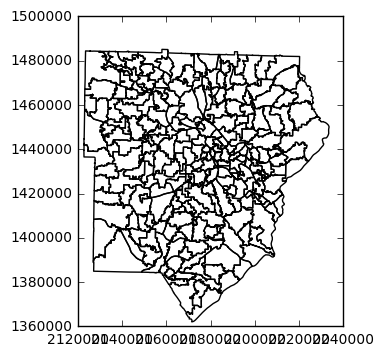

In [6]:
firezones.plot(color="white")

#### Aggregated Zones

In [9]:
DissolveFDZ = gp.GeoDataFrame.from_file(path+"/Supporting_GIS_data/DissolveFDZ160607/DissolveFDZ160607.shp")

In [10]:
DissolveFDZ.shape

(29, 2)

In [11]:
DissolveFDZ.head(2)

,StaNo,geometry
0,01,"POLYGON ((2179569.470180911 1400068.710004993,..."
1,10,"POLYGON ((2165830.559994744 1427647.060031905,..."


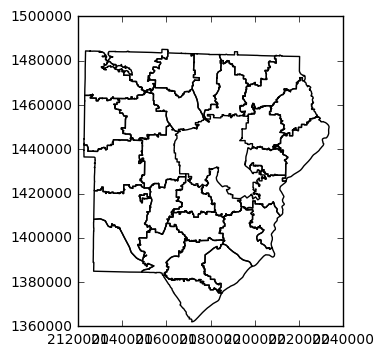

In [21]:
DissolveFDZ.plot(color="white")

### Roads Data

In [12]:
Rd_NetAnaly = gp.GeoDataFrame.from_file(path+"/Supporting_GIS_data/NetworkAnalysis/Rd_NetAnaly.shp")

In [13]:
Rd_NetAnaly.shape

(39092, 41)

In [14]:
Rd_NetAnaly.head(2)

,AM_ONEWAY,DATASOURCE,DEPARTSOUR,DRIVETIME,EDITDATE,EDITOR,FROMEND_EL,FROMTO_DIR,FULLNAME,FUNCTIONAL,...,R_ZIP5,SPEED_LIMI,ST_NAME,SUFFIXDIR,TOENDELEV,TOFROM_DIR,TRANSSEGID,TYPE,geometry,shape_len
0,NA,None,None,0.185262,2005-02-23,ARCADIS,1,0,MAPLE DR,LOCAL,...,30080,25,MAPLE,None,1,0,6b83caed29,DR,LINESTRING (2189233.300106928 1417234.30002709...,407.576123
1,NA,None,None,0.041912,2006-03-20,ARCADIS - 2,1,0,ST SIMONS DR,PRIVATE,...,30066,25,ST SIMONS,None,1,0,9379109c8a,DR,LINESTRING (2178146.634368602 1458087.85436914...,92.206745


In [15]:
Rd_NetAnaly.columns

Index(['AM_ONEWAY', 'DATASOURCE', 'DEPARTSOUR', 'DRIVETIME', 'EDITDATE',
       'EDITOR', 'FROMEND_EL', 'FROMTO_DIR', 'FULLNAME', 'FUNCTIONAL',
       'HIERARCHY', 'HWY_SHIELD', 'LANE_TYPE', 'LENGTH', 'LIFECYCLE',
       'L_COMMUNIT', 'L_HADD', 'L_LADD', 'L_ZIP4', 'L_ZIP5', 'NUMLANES',
       'OBJECTID', 'ONEWAY', 'PM_ONEWAY', 'PREFIXDIR', 'QUAD', 'RECTIFIED',
       'R_COMMUNIT', 'R_HADD', 'R_LADD', 'R_ZIP4', 'R_ZIP5', 'SPEED_LIMI',
       'ST_NAME', 'SUFFIXDIR', 'TOENDELEV', 'TOFROM_DIR', 'TRANSSEGID', 'TYPE',
       'geometry', 'shape_len'],
      dtype='object')

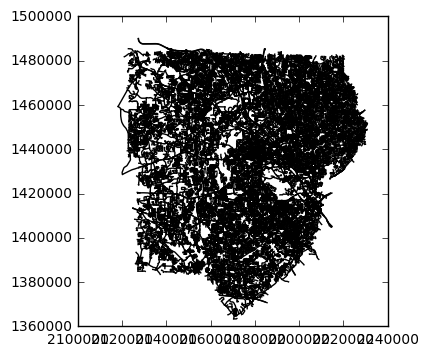

In [22]:
Rd_NetAnaly.plot(color="black")

### Combination of Fire Station Layer and Individual Fire Zone Layer

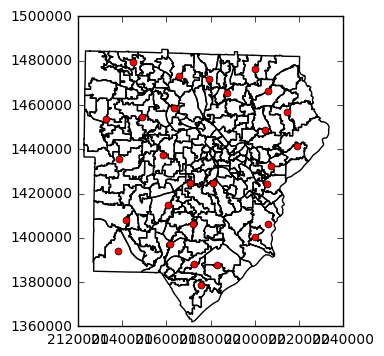

In [17]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
firezones.plot(ax=ax, color="white")
fire_facilities.plot(ax=ax, marker="o", color="red", markersize=5)
plt.show()

### Combination of Fire Station Layer and Aggregated Fire Zone Layer

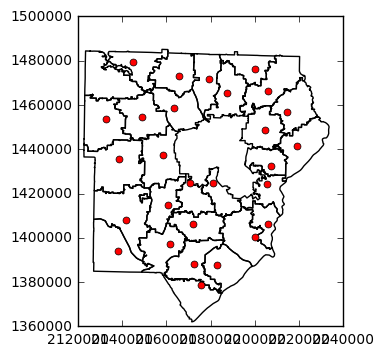

In [16]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
DissolveFDZ.plot(ax=ax, color="white")
fire_facilities.plot(ax=ax, marker="o", color="red", markersize=5)
plt.show()

### Thoughts for Next Step
1. Google MAP API 
2. Future explore traveling time in the historical data